In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow_datasets as tfds
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [1]:
! git clone https://github.com/sundar3112/NN-datasets

Cloning into 'NN-datasets'...
remote: Enumerating objects: 24979, done.
^C


In [0]:
! ls

drive  NN-datasets  sample_data


Setting path to the folder and the categories of the classification

In [0]:
DATADIR = "/content/NN-datasets/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog","Cat"]

Running through the image list and converting each image into a grayscale image for simplicity

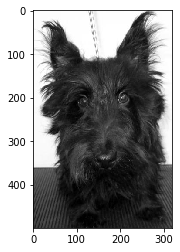

In [0]:
for category in CATEGORIES:
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break


In [0]:
print(img_array)
print(img_array.shape)

[[251 251 251 ... 253 253 253]
 [251 251 251 ... 253 253 253]
 [251 251 251 ... 253 253 253]
 ...
 [ 71  69  61 ...  59  56  60]
 [ 71  66  55 ...  65  57  56]
 [ 71  63  49 ...  65  55  51]]
(500, 319)


Making all images 75*75 image to make it easier to work with for classification

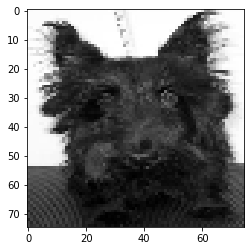

In [0]:
IMG_SIZE = 75 
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

Creating the training data by putting in the read part into a function

In [0]:
training_data=[]

def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()
    



In [0]:
print(len(training_data))

24946


Shuffling the training data to make sure that all the cats and dogs aren't together and to make the dataset adapt to all possible conditions.

In [0]:
import random

random.shuffle(training_data)

In [0]:
for sample in training_data:
  print(sample[1])

Streaming output truncated to the last 5000 lines.
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
0
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1

In [0]:
X = []
y = []

Reshaping the data according to our needs and according to the image size and making it a numpy array

In [0]:
for features,labels in training_data:
  X.append(features)
  y.append(labels)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(X)

[[[[ 57]
   [ 89]
   [139]
   ...
   [137]
   [124]
   [121]]

  [[ 65]
   [ 63]
   [143]
   ...
   [132]
   [126]
   [123]]

  [[ 74]
   [ 54]
   [148]
   ...
   [127]
   [128]
   [125]]

  ...

  [[130]
   [128]
   [142]
   ...
   [129]
   [123]
   [119]]

  [[135]
   [133]
   [121]
   ...
   [130]
   [127]
   [125]]

  [[131]
   [131]
   [129]
   ...
   [132]
   [129]
   [125]]]


 [[[127]
   [136]
   [148]
   ...
   [134]
   [139]
   [140]]

  [[120]
   [137]
   [122]
   ...
   [133]
   [132]
   [130]]

  [[141]
   [138]
   [119]
   ...
   [131]
   [133]
   [135]]

  ...

  [[102]
   [114]
   [ 97]
   ...
   [129]
   [119]
   [113]]

  [[ 91]
   [ 88]
   [ 98]
   ...
   [116]
   [136]
   [133]]

  [[ 96]
   [113]
   [ 94]
   ...
   [134]
   [108]
   [101]]]


 [[[ 45]
   [ 34]
   [ 20]
   ...
   [ 88]
   [ 81]
   [ 79]]

  [[ 44]
   [ 50]
   [ 28]
   ...
   [ 89]
   [ 82]
   [ 80]]

  [[ 59]
   [ 50]
   [ 35]
   ...
   [ 90]
   [ 83]
   [ 81]]

  ...

  [[112]
   [124]
   [128]
   

Storing our current data in a pickle file to prevent loss of data

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
print(X[1])

[[[127]
  [136]
  [148]
  ...
  [134]
  [139]
  [140]]

 [[120]
  [137]
  [122]
  ...
  [133]
  [132]
  [130]]

 [[141]
  [138]
  [119]
  ...
  [131]
  [133]
  [135]]

 ...

 [[102]
  [114]
  [ 97]
  ...
  [129]
  [119]
  [113]]

 [[ 91]
  [ 88]
  [ 98]
  ...
  [116]
  [136]
  [133]]

 [[ 96]
  [113]
  [ 94]
  ...
  [134]
  [108]
  [101]]]


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

#normalizing the data, since its grayscale, we can divide by 255, else we can keras.util.normalization as well
X=X/255.0

model = Sequential()

#adding 2 layers of convolutional layers of 2d, setting relu as activation function and using maxpooling
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#converting 2d data to 1d to fit into the dense layer because it accepts 1d as input. Adding 64 node dense layer.
model.add(Flatten())
model.add(Dense(64))

#adding a last dense layer as sigmoid activation function
model.add(Dense(1))
model.add(Activation("sigmoid"))

#binary crossentropy used for loss function since its a binary classification here, adam optimizer. 
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

import math
#number of epochs can be increased to getter better accuracy
model.fit(X, y, batch_size = 32, epochs=10, validation_split=0.1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 16s 707us/sample - loss: 0.6570 - acc: 0.6034 - val_loss: 0.5924 - val_acc: 0.6846
Epoch 2/10
22451/22451 [==============================] - 9s 419us/sample - loss: 0.5648 - acc: 0.7137 - val_loss: 0.5475 - val_acc: 0.7214
Epoch 3/10
22451/22451 [==============================] - 9s 421us/sample - loss: 0.5020 - acc: 0.7562 - val_loss: 0.4996 - val_acc: 0.7579
Epoch 4/10
22451/22451 [==============================] - 9s 423us/sample - loss: 0.4619 - acc: 0.7856 - val_loss: 0.4808 - val_acc: 0.7675
Epoch 5/10
22451/22451 [==============================] - 10s 423us/sample - loss: 0.4296 - acc: 0.8042 - val_loss: 0.4658 - val_acc: 0.7832
Epoch 6/10
22451/22451 [==============================] - 9s 418us/sample 